In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

In [2]:
df_main = pd.read_csv("flights.csv", index_col=0)

In [3]:
df_main.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2019,1,1,6,7,2019-01-06,9E,3280,10397,ATL,...,0.0,47.0,37.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,7,1,2019-01-07,9E,3280,10397,ATL,...,0.0,47.0,32.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,8,2,2019-01-08,9E,3280,10397,ATL,...,0.0,47.0,39.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,9,3,2019-01-09,9E,3280,10397,ATL,...,0.0,47.0,37.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,10,4,2019-01-10,9E,3280,10397,ATL,...,0.0,47.0,41.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583985 entries, 0 to 583984
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 583985 non-null  int64  
 1   QUARTER              583985 non-null  int64  
 2   MONTH                583985 non-null  int64  
 3   DAY_OF_MONTH         583985 non-null  int64  
 4   DAY_OF_WEEK          583985 non-null  int64  
 5   FL_DATE              583985 non-null  object 
 6   OP_UNIQUE_CARRIER    583985 non-null  object 
 7   OP_CARRIER_FL_NUM    583985 non-null  int64  
 8   ORIGIN_AIRPORT_ID    583985 non-null  int64  
 9   ORIGIN               583985 non-null  object 
 10  DEST_AIRPORT_ID      583985 non-null  int64  
 11  DEST                 583985 non-null  object 
 12  CRS_DEP_TIME         583985 non-null  int64  
 13  DEP_TIME             567633 non-null  float64
 14  DEP_DELAY_NEW        567630 non-null  float64
 15  CRS_ARR_TIME     

In [5]:
# changing column names to lower case
df_main.columns = df_main.columns.str.lower()

In [6]:
df_main[df_main.columns[:15]].describe()

,year,quarter,month,day_of_month,day_of_week,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay_new
count,583985.0,583985.0,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,567633.000000,567630.000000
mean,2019.0,1.0,1.0,15.960088,3.835626,2537.869334,12659.701982,12659.470015,1326.266642,1331.957814,13.258226
std,0.0,0.0,0.0,8.987942,1.921899,1821.736145,1519.405493,1519.336466,484.081000,495.404020,47.507390
min,2019.0,1.0,1.0,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,0.000000
25%,2019.0,1.0,1.0,8.000000,2.000000,979.000000,11292.000000,11292.000000,917.000000,921.000000,0.000000
50%,2019.0,1.0,1.0,16.000000,4.000000,2114.000000,12889.000000,12889.000000,1320.000000,1328.000000,0.000000
75%,2019.0,1.0,1.0,24.000000,5.000000,3902.000000,13931.000000,13931.000000,1730.000000,1738.000000,5.000000
max,2019.0,1.0,1.0,31.000000,7.000000,7439.000000,16218.000000,16218.000000,2359.000000,2400.000000,1651.000000


In [7]:
df_main[df_main.columns[15:]].describe()

,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,583985.000000,566924.000000,565963.000000,583985.000000,583985.000000,583851.000000,565963.000000,565963.000000,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000
mean,1502.665556,1484.315921,4.257506,0.028641,0.002219,143.557401,138.610077,112.694461,797.742767,20.106080,4.428551,18.508392,0.079508,24.950590
std,505.350299,523.162855,51.159511,0.166796,0.047056,73.216303,73.078565,71.195757,589.999261,65.762202,38.535323,41.726392,3.203342,50.851973
min,1.000000,1.000000,-85.000000,0.000000,0.000000,20.000000,16.000000,4.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1115.000000,1104.000000,-16.000000,0.000000,0.000000,90.000000,85.000000,61.000000,363.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1525.000000,1517.000000,-7.000000,0.000000,0.000000,125.000000,121.000000,94.000000,640.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,1922.000000,1919.000000,7.000000,0.000000,0.000000,175.000000,170.000000,143.000000,1037.000000,16.000000,0.000000,21.000000,0.000000,29.000000
max,2400.000000,2400.000000,1638.000000,1.000000,1.000000,703.000000,737.000000,691.000000,4983.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000


### converting data into right types
- year, quarter, month, day_of_month, day_of_week should be catgories
- op_carrier_fl_num, origin_airport_id, dest_airport_id should be catgories
- fl_date should be datetime and should be made as index to be useful in analysis


In [8]:
lst_catgs = ['year', 'quarter', 'month', 'day_of_month', 'day_of_week','op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id']
for col in lst_catgs:
    df_main[col] = df_main[col].astype('category')
    
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583985 entries, 0 to 583984
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   year                 583985 non-null  category
 1   quarter              583985 non-null  category
 2   month                583985 non-null  category
 3   day_of_month         583985 non-null  category
 4   day_of_week          583985 non-null  category
 5   fl_date              583985 non-null  object  
 6   op_unique_carrier    583985 non-null  object  
 7   op_carrier_fl_num    583985 non-null  category
 8   origin_airport_id    583985 non-null  category
 9   origin               583985 non-null  object  
 10  dest_airport_id      583985 non-null  category
 11  dest                 583985 non-null  object  
 12  crs_dep_time         583985 non-null  int64   
 13  dep_time             567633 non-null  float64 
 14  dep_delay_new        567630 non-null  float64 
 15  

In [9]:
df_main["fl_date"] = pd.to_datetime(df_main.fl_date)
df_main.set_index('fl_date', inplace=True)

In [10]:
df_main.head()

,year,quarter,month,day_of_month,day_of_week,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
fl_date,,,,,,,,,,,,,,,,,,,,,
2019-01-06,2019,1,1,6,7,9E,3280,10397,ATL,11150,...,0.0,47.0,37.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-07,2019,1,1,7,1,9E,3280,10397,ATL,11150,...,0.0,47.0,32.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-08,2019,1,1,8,2,9E,3280,10397,ATL,11150,...,0.0,47.0,39.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-09,2019,1,1,9,3,9E,3280,10397,ATL,11150,...,0.0,47.0,37.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-10,2019,1,1,10,4,9E,3280,10397,ATL,11150,...,0.0,47.0,41.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN


### In our data we have origin and destination airports, however they do not make sense as only shortcuts are used.
- we should find a way to convert them into meaningful names
----
#### After searching the internet, there is a website offers full names for all airport shortcuts and we will try to scrap it and use it in our data

In [11]:
url = 'https://www.prokerala.com/travel/airports/united-states-of-america/'
codes_page = requests.get(url).content
page_text = BeautifulSoup(codes_page,'lxml')
lst_codes = []
for i in page_text.find_all('table')[2].find_all('td'):
    lst_codes.append(i.text)

In [12]:
lst_codes = []
for i in page_text.find_all('table'):
    for j in i.find_all('td'):
        lst_codes.append(j.text)

In [13]:
new_lst= []
ap_codes = {}
for i in lst_codes:
    if len(i) >= 3 and len(i) != 4:
        new_lst.append(i)

new_lst_clean = []
for x in new_lst:
    if re.search('[0-9]{3}',x)==None:
        new_lst_clean.append(str(x).replace('\n',' ').strip())

new_lst_clean[0:20]

['A L Mangham Jr. Regional Airport  Nacogdoches, TX',
 'OCH',
 'AAF Heliport Airport  Fort Devens',
 'AYE',
 'Acadiana Regional Airport  New Iberia',
 'ARA',
 'Accomack County Airport  Melfa',
 'MFV',
 'Adak Island Ns Airport  Adak Island',
 'ADK',
 'Adams Field Airport  Little Rock, AR',
 'LIT',
 'Addison Airport  Dallas',
 'ADS',
 'Adirondack Airport  Saranac Lake',
 'SLK',
 'Af Aux Airport  Indian Springs',
 'INS',
 'AFB Airport  Homestead',
 'HST']

In [14]:
ap_codes = {}
for i in range(0,len(new_lst_clean),2):
    ap_codes[new_lst_clean[i+1]] = new_lst_clean[i]
    

In [15]:
list(ap_codes.items())[0:10]

[('OCH', 'A L Mangham Jr. Regional Airport  Nacogdoches, TX'),
 ('AYE', 'AAF Heliport Airport  Fort Devens'),
 ('ARA', 'Acadiana Regional Airport  New Iberia'),
 ('MFV', 'Accomack County Airport  Melfa'),
 ('ADK', 'Adak Island Ns Airport  Adak Island'),
 ('LIT', 'Adams Field Airport  Little Rock, AR'),
 ('ADS', 'Addison Airport  Dallas'),
 ('SLK', 'Adirondack Airport  Saranac Lake'),
 ('INS', 'Af Aux Airport  Indian Springs'),
 ('HST', 'AFB Airport  Homestead')]

#### After extracting the reports in ready dictionary to be added for our operation we should check if we have all the airports shortcuts

In [16]:
df_main.loc[df_main.origin.isin(ap_codes.keys())==False, 'origin'].unique()

array(['CSG', 'ECP', 'SJU', 'AZA', 'USA', 'BQN', 'PSE', 'STT', 'STX',
       'GUM', 'SPN', 'TXK', 'PPG'], dtype=object)

In [17]:
df_main.loc[df_main.dest.isin(ap_codes.keys())==False, 'dest'].unique()

array(['CSG', 'SJU', 'ECP', 'USA', 'AZA', 'BQN', 'PSE', 'STT', 'STX',
       'GUM', 'SPN', 'TXK', 'PPG'], dtype=object)

#### We see that there are some missing values in both origin and dest we will search for them

In [18]:
missing_ap = {
    'CSG':'Columbus Metropolitan Airport',
    'ECP':"Northwest Florida Beaches International Airport",
    'SJU':"Luis Muñoz Marín International Airport",
    'AZA':"Phoenix-Mesa Gateway Airport",
    'USA':"Concord Regional Airport",
    'BQN':"Rafael Hernández International Airport",
    'PSE':"Mercedita International Airport",
    'STT':"Cyril E. King Airport",
    'STX':"Henry E. Rohlsen Airport",
    'GUM':"Antonio B. Won Pat International Airport",
    'SPN':"Saipan International Airport",
    'TXK':"Texarkana Regional Airport",
    'PPG':"Pago Pago International Airport"
}

In [19]:
for i in missing_ap.keys():
    ap_codes[i] = missing_ap[i]

In [20]:
# now we check again
df_main.loc[df_main.dest.isin(ap_codes.keys())==False, 'dest'].unique(), df_main.loc[df_main.origin.isin(ap_codes.keys())==False, 'origin'].unique()

(array([], dtype=object), array([], dtype=object))

In [21]:
# in order to keep our dictionary we can save it in csv format
df_airports_names = pd.DataFrame(ap_codes.items(), columns=["airport_code","airport_full_name"])
df_airports_names.to_csv("US_airports_names_codes.csv")

In [22]:
df_airports_names.head()

,airport_code,airport_full_name
0,OCH,"A L Mangham Jr. Regional Airport Nacogdoches, TX"
1,AYE,AAF Heliport Airport Fort Devens
2,ARA,Acadiana Regional Airport New Iberia
3,MFV,Accomack County Airport Melfa
4,ADK,Adak Island Ns Airport Adak Island


In [27]:
str(["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK"]).lower()

"['quarter', 'month', 'day_of_month', 'day_of_week']"

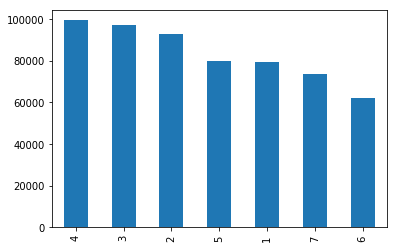

In [37]:
df_main['day_of_week'].value_counts().plot(kind='bar')

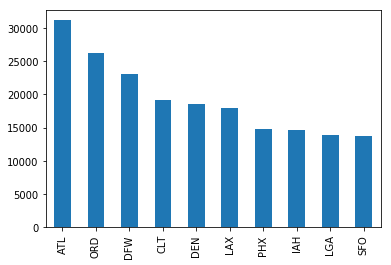

In [41]:
df_main['origin'].value_counts()[:10].plot(kind='bar')

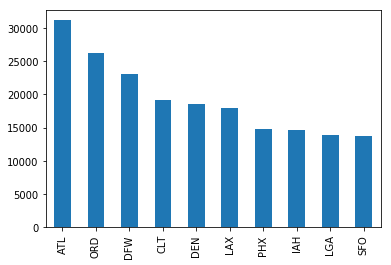

In [42]:
df_main['dest'].value_counts()[:10].plot(kind='bar')

In [69]:
df_main['dep_delay_new'].describe()

count    567630.000000
mean         13.258226
std          47.507390
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max        1651.000000
Name: dep_delay_new, dtype: float64

(-10, 250)

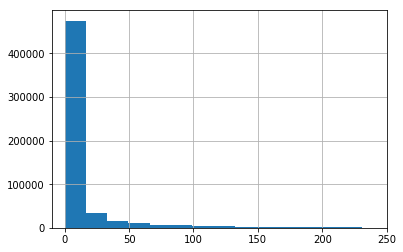

In [97]:
df_main['dep_delay_new'].hist(bins=100)
plt.xlim(-10,250)

In [81]:
df_main['arr_delay'].describe()

count    565963.000000
mean          4.257506
std          51.159511
min         -85.000000
25%         -16.000000
50%          -7.000000
75%           7.000000
max        1638.000000
Name: arr_delay, dtype: float64

(-100, 280)

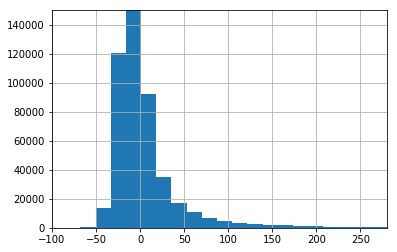

In [94]:
df_main['arr_delay'].hist(bins=100)
plt.ylim(0,150000)
plt.xlim(-100,280)

In [98]:
df_main['distance'].describe()

count    583985.000000
mean        797.742767
std         589.999261
min          31.000000
25%         363.000000
50%         640.000000
75%        1037.000000
max        4983.000000
Name: distance, dtype: float64

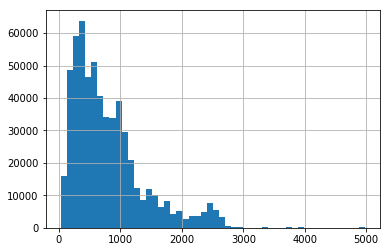

In [100]:
df_main['distance'].hist(bins=50)

In [101]:
df_main['carrier_delay'].describe()

count    105222.000000
mean         20.106080
std          65.762202
min           0.000000
25%           0.000000
50%           0.000000
75%          16.000000
max        1638.000000
Name: carrier_delay, dtype: float64

(0, 80000)

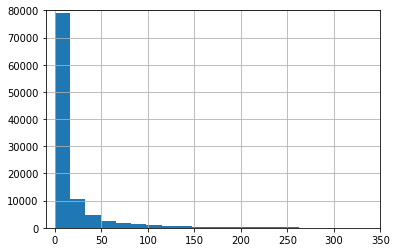

In [110]:
df_main['carrier_delay'].hist(bins=100)
plt.xlim(-10,350)
plt.ylim(0,80000)

In [111]:
df_main['weather_delay'].describe()

count    105222.000000
mean          4.428551
std          38.535323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1416.000000
Name: weather_delay, dtype: float64

(0, 10000)

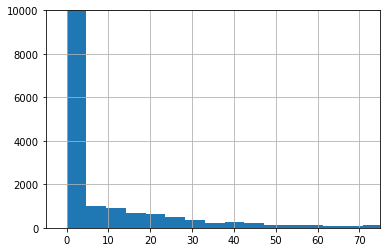

In [125]:
df_main['weather_delay'].hist(bins=300)
plt.xlim(-5,75)
plt.ylim(0,10000)